In [5]:
!python3 -m pip install pandas



In [6]:
import pandas as pd
print(pd.__version__)


2.3.3


In [7]:
import pandas as pd

# Загрузим датасет (замени путь, если нужно)
path = "Electronic_sales_Sep2023-Sep2024.csv"
df = pd.read_csv(path)

# Посмотрим на структуру данных
print(df.head())
print(df.columns)


   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory   

1 задание

In [ ]:
import pandas as pd


df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

preferred_payment = (
    df.groupby(['Customer ID', 'Payment Method'])
      .size()
      .reset_index(name='count')
      .sort_values(['Customer ID', 'count'], ascending=[True, False])
      .drop_duplicates('Customer ID')
      [['Customer ID', 'Payment Method']]
      .rename(columns={'Payment Method': 'PreferredPaymentMethod'})
)

total_spent = df.groupby('Customer ID')['Total Price'].sum().reset_index(name='TotalSpent')

extra_spent = df.groupby('Customer ID')['Add-on Total'].sum().reset_index(name='ExtraSpent')

result = preferred_payment.merge(total_spent, on='Customer ID', how='left') \
                          .merge(extra_spent, on='Customer ID', how='left')

print(result.head())


   Customer ID PreferredPaymentMethod  TotalSpent  ExtraSpent
0         1000            Credit Card     6279.42       66.30
1         1002                   Cash     5020.60       60.16
2         1003                   Cash       41.50       35.56
3         1004            Credit Card       83.00       65.78
4         1005             Debit Card    11779.11       75.33


2 задание

In [16]:
!pip install --upgrade matplotlib


Доход по методам доставки
  Shipping Type      Revenue
0     Expedited  12437526.21
1       Express   8685215.62
2     Overnight   8704828.17
3      Same Day  12432024.82
4      Standard  21343073.55




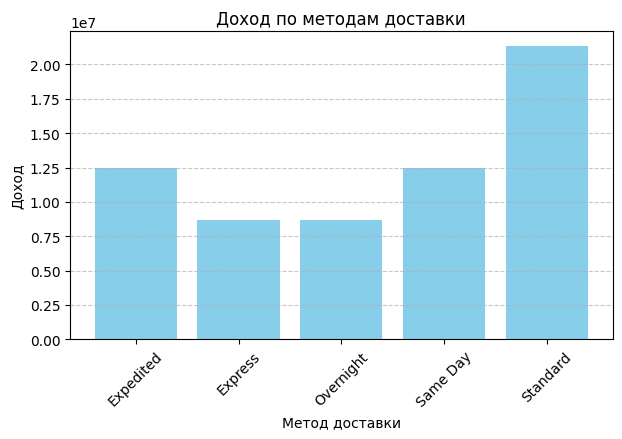

Доход по типам продуктов
  Product Type      Revenue
0   Headphones   4041400.24
1       Laptop  12296239.97
2   Smartphone  21516754.69
3   Smartwatch  14036273.06
4       Tablet  11712000.41




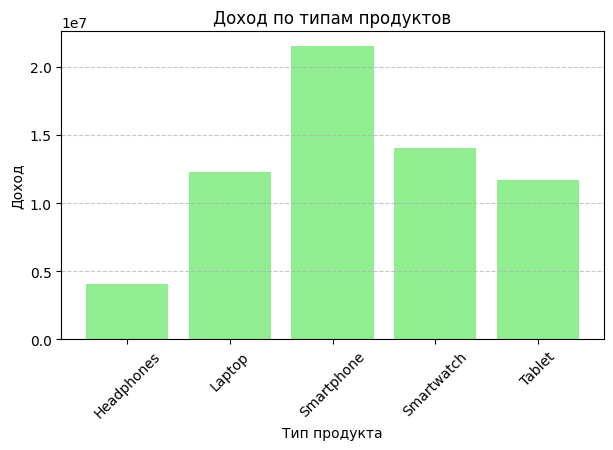

Доход от дополнительных услуг по месяцам
      Month    Revenue
0   2023-09    8012.62
1   2023-10   37837.12
2   2023-11   34888.81
3   2023-12   33509.15
4   2024-01  136195.16
5   2024-02  120148.92
6   2024-03  124954.26
7   2024-04  123973.59
8   2024-05  132018.51
9   2024-06  126689.59
10  2024-07  132017.20
11  2024-08  135133.14
12  2024-09   99518.89




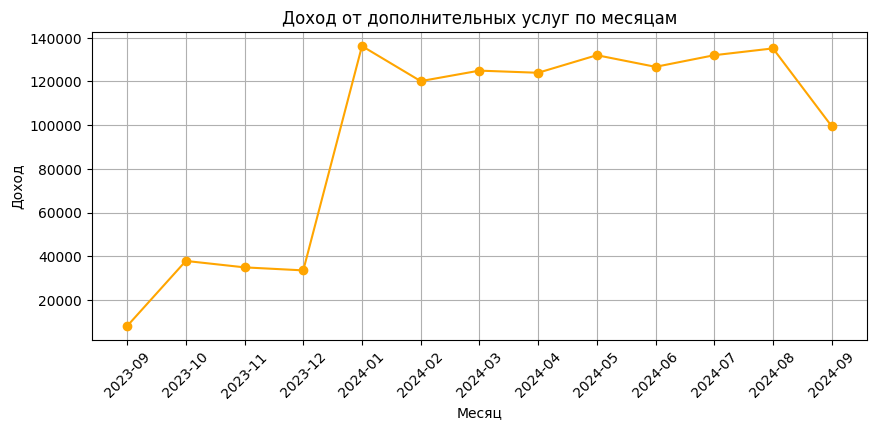

Доход от дополнительных услуг по кварталам
  Quarter    Revenue
0  2023Q3    8012.62
1  2023Q4  106235.08
2  2024Q1  381298.34
3  2024Q2  382681.69
4  2024Q3  366669.23




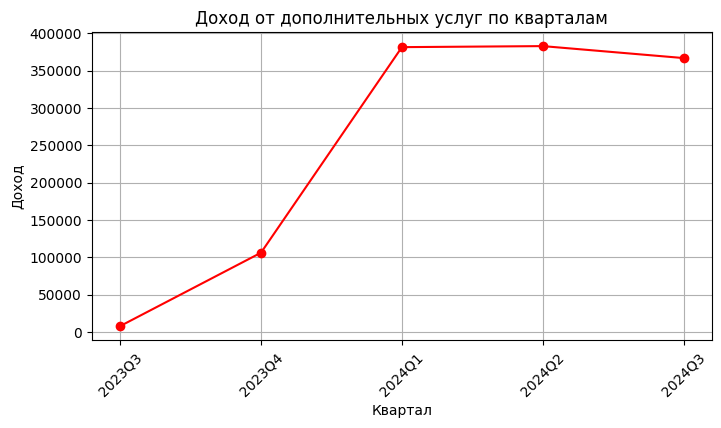

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')


revenue_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().reset_index(name='Revenue')
print("Доход по методам доставки")
print(revenue_by_shipping)
print("\n")
plt.figure(figsize=(7,4))
plt.bar(revenue_by_shipping['Shipping Type'], revenue_by_shipping['Revenue'], color='skyblue')
plt.title('Доход по методам доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


revenue_by_product = df.groupby('Product Type')['Total Price'].sum().reset_index(name='Revenue')
print("Доход по типам продуктов")
print(revenue_by_product)
print("\n")
plt.figure(figsize=(7,4))
plt.bar(revenue_by_product['Product Type'], revenue_by_product['Revenue'], color='lightgreen')
plt.title('Доход по типам продуктов')
plt.xlabel('Тип продукта')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


revenue_extras_month = df.groupby('Month')['Add-on Total'].sum().reset_index(name='Revenue')
print("Доход от дополнительных услуг по месяцам")
print(revenue_extras_month)
print("\n")
plt.figure(figsize=(10,4))
plt.plot(revenue_extras_month['Month'].astype(str), revenue_extras_month['Revenue'], marker='o', color='orange')
plt.title('Доход от дополнительных услуг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


revenue_extras_quarter = df.groupby('Quarter')['Add-on Total'].sum().reset_index(name='Revenue')
print("Доход от дополнительных услуг по кварталам")
print(revenue_extras_quarter)
print("\n")
plt.figure(figsize=(8,4))
plt.plot(revenue_extras_quarter['Quarter'].astype(str), revenue_extras_quarter['Revenue'], marker='o', color='red')
plt.title('Доход от дополнительных услуг по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
